importing Jupyter notebook from EMA_Bootstrap.ipynb


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(861,)
(610,)
importing Jupyter notebook from MACD_bootstrap.ipynb
importing Jupyter notebook from SVM_bootstrap.ipynb


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


importing Jupyter notebook from Autoregression_Bootstrap.ipynb
1.9076290240331346


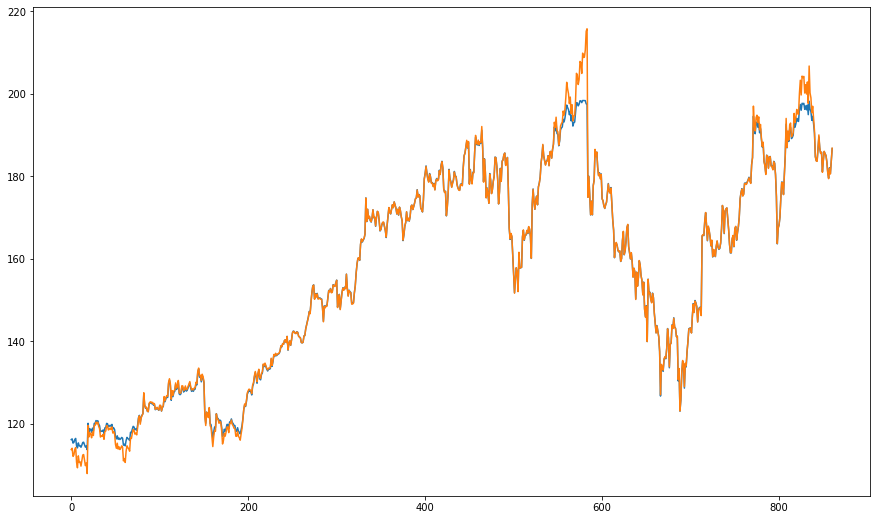

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from bootstrap import ar1_bstr, ema_bstr, kf_bstr, svm_bstr, get_Y
#from bootstrap import pp_bstr
import import_ipynb
from EMA_Bootstrap import ema_bootstrap
from MACD_bootstrap import bootstrap
from SVM_bootstrap import svm_bstr
from Autoregression_Bootstrap import AR_bootstrap
from pandas_datareader import DataReader
from datetime import datetime
# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [4]:
!pip install import_ipynb

In [6]:
facebook = DataReader('FB',  'yahoo', datetime(2016,4,1), datetime(2019,9,1));
facebook.reset_index(inplace=True,drop=False)
facebook.set_index('Date')
facebook['OpenTmr'] = facebook['Open'].shift(-1)
facebook['CloseTmr'] = facebook['Close'].shift(-1)
facebook['OpenClose']= (facebook['Open']+ facebook['Close'])/2
facebook['HighLow'] = (facebook['High']+ facebook['Low'])/2
facebook['OCHL'] = (facebook['Open']+ facebook['Close']+facebook['High']+ facebook['Low'])/4
facebook['CloseYest'] = facebook['Close'].shift(-1)
facebook['Close2dayBefore'] = facebook['Close'].shift(-2)
#facebook.head()
facebook=facebook.set_index('Date')
facebook.index = facebook.index.map(lambda x: x.strftime('%Y-%m-%d'))
facebook = facebook.dropna(0)
facebook.tail()

,High,Low,Open,Close,Volume,Adj Close,OpenTmr,CloseTmr,OpenClose,HighLow,OCHL,CloseYest,Close2dayBefore
Date,,,,,,,,,,,,,
2019-08-22,184.110001,179.910004,183.429993,182.039993,10821400,182.039993,180.839996,177.750000,182.734993,182.010002,182.372498,177.750000,180.360001
2019-08-23,183.130005,176.660004,180.839996,177.750000,17323400,177.750000,179.399994,180.360001,179.294998,179.895004,179.595001,180.360001,181.300003
2019-08-26,180.500000,178.240005,179.399994,180.360001,8773600,180.360001,181.929993,181.300003,179.879997,179.370003,179.625000,181.300003,181.759995
2019-08-27,184.039993,181.009995,181.929993,181.300003,14399600,181.300003,180.529999,181.759995,181.614998,182.524994,182.069996,181.759995,185.570007
2019-08-28,181.949997,178.919998,180.529999,181.759995,9386100,181.759995,183.770004,185.570007,181.144997,180.434998,180.789997,185.570007,185.669998


In [7]:
N = facebook.shape[0] 
num_boot = 300 # total num bootstrap
T= 250 # start day
window = 200 # training period window
Y =facebook['OpenTmr'][-(N-(T+1)):].values
Y_close = facebook['CloseTmr'][-(N-(T+1)):].values

In [8]:
facebook.corr()

,High,Low,Open,Close,Volume,Adj Close,OpenTmr,CloseTmr,OpenClose,HighLow,OCHL,CloseYest,Close2dayBefore
High,1.000000,0.997625,0.998500,0.998287,-0.062786,0.998287,0.994649,0.992300,0.999225,0.999419,0.999385,0.992300,0.986420
Low,0.997625,1.000000,0.997932,0.998573,-0.108002,0.998573,0.994994,0.992618,0.999085,0.999393,0.999301,0.992618,0.986683
Open,0.998500,0.997932,1.000000,0.996670,-0.078632,0.996670,0.992821,0.990889,0.999166,0.998812,0.999052,0.990889,0.985167
Close,0.998287,0.998573,0.996670,1.000000,-0.087097,1.000000,0.996488,0.993616,0.999169,0.999022,0.999158,0.993616,0.987473
Volume,-0.062786,-0.108002,-0.078632,-0.087097,1.000000,-0.087097,-0.089579,-0.096890,-0.082937,-0.085189,-0.084068,-0.096890,-0.103371
Adj Close,0.998287,0.998573,0.996670,1.000000,-0.087097,1.000000,0.996488,0.993616,0.999169,0.999022,0.999158,0.993616,0.987473
OpenTmr,0.994649,0.994994,0.992821,0.996488,-0.089579,0.996488,1.000000,0.996667,0.995485,0.995411,0.995510,0.996667,0.990871
CloseTmr,0.992300,0.992618,0.990889,0.993616,-0.096890,0.993616,0.996667,1.000000,0.993081,0.993047,0.993126,1.000000,0.993616
OpenClose,0.999225,0.999085,0.999166,0.999169,-0.082937,0.999169,0.995485,0.993081,1.000000,0.999750,0.999937,0.993081,0.987143
HighLow,0.999419,0.999393,0.998812,0.999022,-0.085189,0.999022,0.995411,0.993047,0.999750,1.000000,0.999937,0.993047,0.987137


([<matplotlib.axis.YTick at 0x7f2a1d543160>,
 [Text(0, 0, 'High'),
  Text(0, 0, 'Low'),
  Text(0, 0, 'Open'),
  Text(0, 0, 'Close'),
  Text(0, 0, 'Volume'),
  Text(0, 0, 'Adj Close'),
  Text(0, 0, 'OpenTmr'),
  Text(0, 0, 'CloseTmr'),
  Text(0, 0, 'OpenClose'),
  Text(0, 0, 'HighLow'),
  Text(0, 0, 'OCHL'),
  Text(0, 0, 'CloseYest'),
  Text(0, 0, 'Close2dayBefore')])

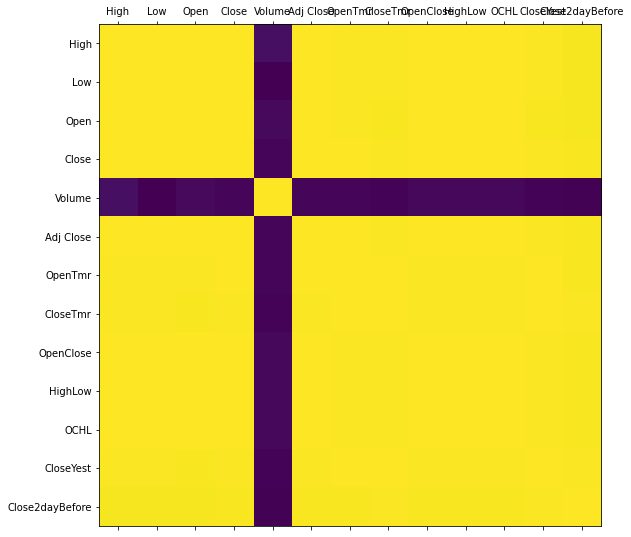

In [9]:
import seaborn as sns
plt.matshow(facebook.corr())
plt.xticks(range(len(facebook.columns)),facebook.columns)
plt.yticks(range(len(facebook.columns)),facebook.columns)

In [10]:

yhat_ar1, rmse_ar1 = AR_bootstrap()    
yhat_ema, rmse_ema = ema_bootstrap()
#yhat_pp, rmse_pp = pp_bstr()  # too slow 
yhat_macd, rmse_macd = bootstrap()
#num_boot = 1
yhat_svm, rmse_svm = svm_bstr()
    
print("AR_RMSE: ", rmse_ar1)
print("EMA_RMSE: ", rmse_ema)
print("MACD_RMSE: ", rmse_macd)
#print("kf_RMSE: ", rmse_kf)
print("SVM_RMSE: ", rmse_svm)

AR_RMSE:  1.9076290240331346
EMA_RMSE:  5.050240539306411
MACD_RMSE:  5.1444098494264665
SVM_RMSE:  32.12838107090388


In [11]:
def random_forest():
    "random forest voting"
    T=Y.shape[0]-1
    print(T)
    Y_rf = np.zeros(T)
    for t in range(0, T):
        if min(abs(yhat_ema[t]-Y[t]),abs(yhat_macd[t]-Y[t]),abs(yhat_ar1[t]-Y[t]),
               abs(yhat_svm[t]-Y[t]))==abs(yhat_ema[t]-Y[t]):
            Y_rf[t] = yhat_ema[t]
        elif min(abs(yhat_ema[t]-Y[t]),abs(yhat_macd[t]-Y[t]),abs(yhat_ar1[t]-Y[t]),
                 abs(yhat_svm[t]-Y[t]))==abs(yhat_macd[t]-Y[t]):
            Y_rf[t] = yhat_macd[t]
        elif min(abs(yhat_macd[t]-Y[t]),abs(yhat_ema[t]-Y[t]),abs(yhat_svm[t]-Y[t]),
                 abs(yhat_ar1[t]-Y[t]))==abs(yhat_ar1[t]-Y[t]):
            Y_rf[t] = yhat_ar1[t]          
        else:
            Y_rf[t] = yhat_svm[t]  
    
    rmse_rf=np.sqrt(np.mean((Y[:-1]-Y_rf)**2))
    print("random forest rmse: ", rmse_rf)
    return Y, Y_rf, Y_close

In [12]:
Y, Y_rf, Y_close = random_forest()

607
random forest rmse:  1.6211889048736239


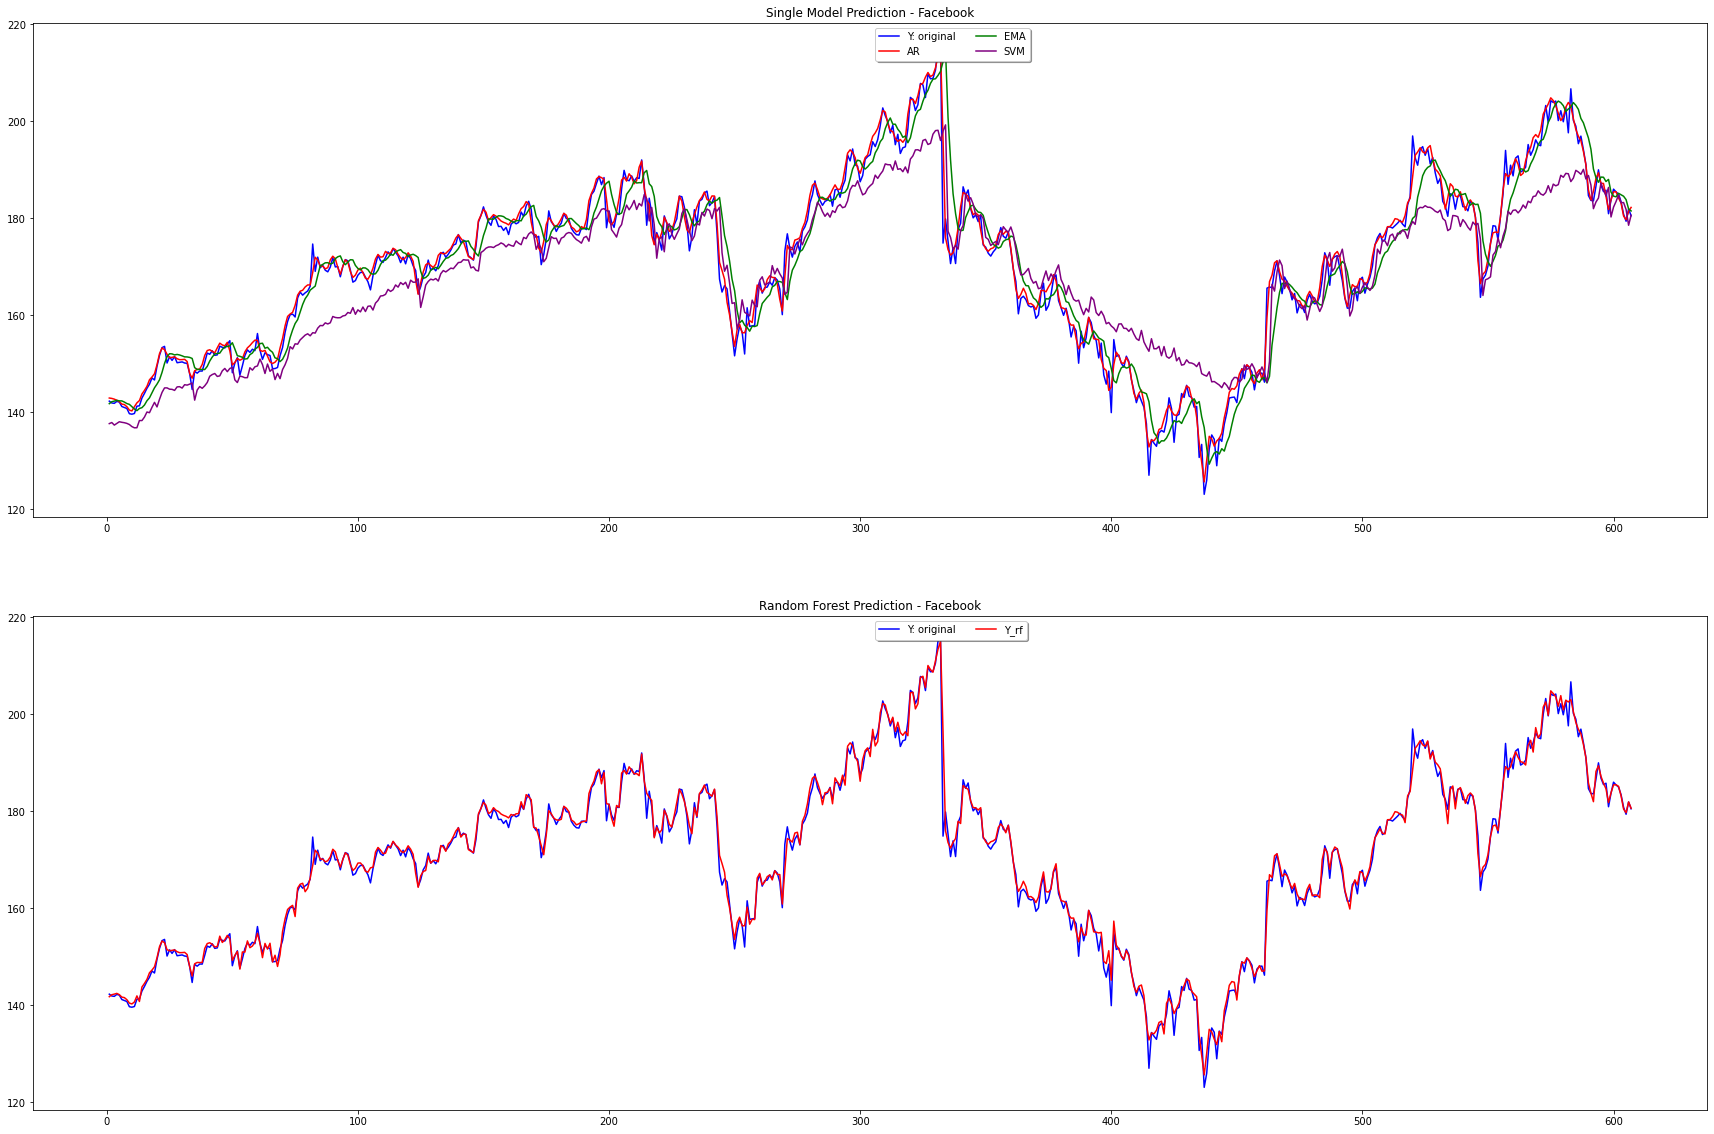

In [13]:
timevec = np.linspace(1,607,607)
plt.figure(figsize=(30,20))
ax = plt.subplot(211)
ax.plot(timevec, Y[:-1], 'blue', label = "Y: original")
ax.plot(timevec, yhat_ar1[:-1], 'red', label = "AR")
ax.plot(timevec, yhat_ema[:-3], 'green', label = "EMA")
ax.plot(timevec, yhat_svm[:-3], 'purple', label = "SVM")
plt.title('Single Model Prediction - Facebook')
ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
ax = plt.subplot(212)
ax.plot(timevec, Y[:-1], 'blue', label = "Y: original")
ax.plot(timevec, Y_rf, 'red', label = "Y_rf")
plt.title('Random Forest Prediction - Facebook')
ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

In [14]:
facebook.tail()

,High,Low,Open,Close,Volume,Adj Close,OpenTmr,CloseTmr,OpenClose,HighLow,OCHL,CloseYest,Close2dayBefore
Date,,,,,,,,,,,,,
2019-08-22,184.110001,179.910004,183.429993,182.039993,10821400,182.039993,180.839996,177.750000,182.734993,182.010002,182.372498,177.750000,180.360001
2019-08-23,183.130005,176.660004,180.839996,177.750000,17323400,177.750000,179.399994,180.360001,179.294998,179.895004,179.595001,180.360001,181.300003
2019-08-26,180.500000,178.240005,179.399994,180.360001,8773600,180.360001,181.929993,181.300003,179.879997,179.370003,179.625000,181.300003,181.759995
2019-08-27,184.039993,181.009995,181.929993,181.300003,14399600,181.300003,180.529999,181.759995,181.614998,182.524994,182.069996,181.759995,185.570007
2019-08-28,181.949997,178.919998,180.529999,181.759995,9386100,181.759995,183.770004,185.570007,181.144997,180.434998,180.789997,185.570007,185.669998


In [15]:
N = facebook.shape[0] # total num days
num_boot = 300 # total num bootstrap
T= 250 # start day
window = 200 # training period window


Y =facebook['OpenTmr'][-(N-(T+1)):].values

rmse,y_hat,Y_close = random_forest()

607
random forest rmse:  1.6211889048736239


### DAY TRADE

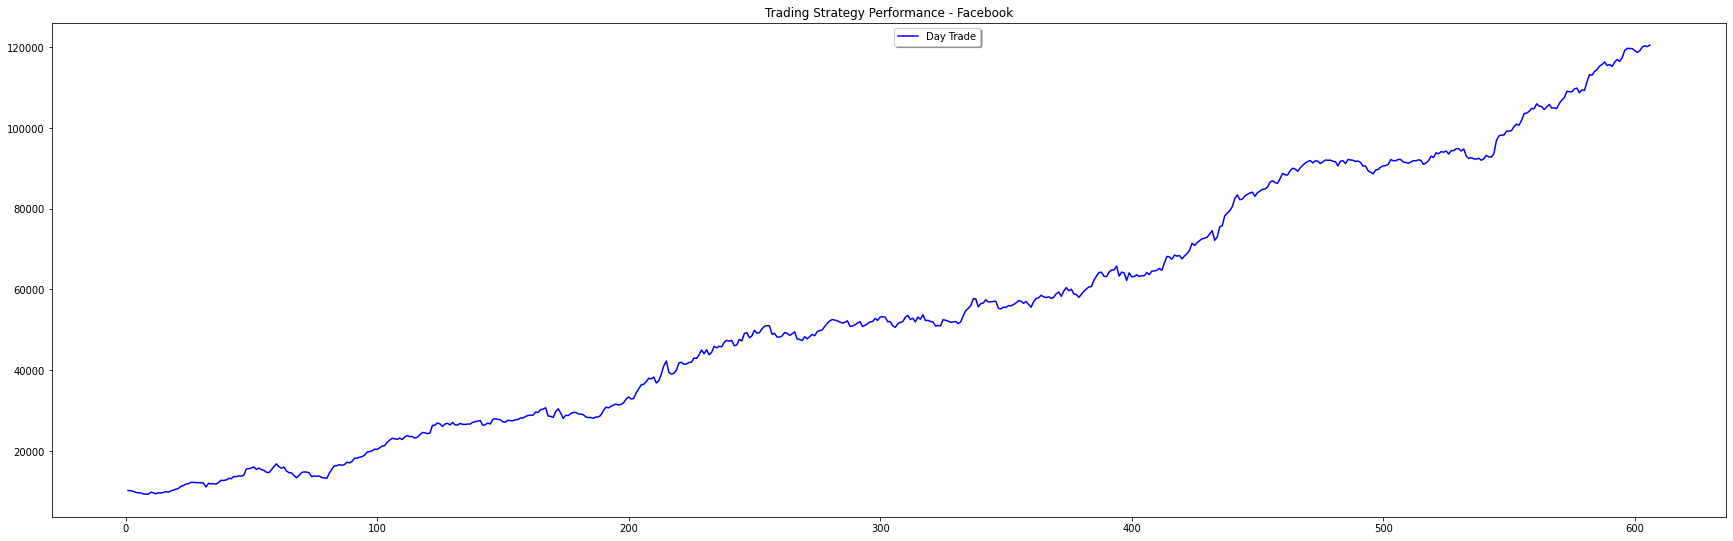

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

#Account Balances
init_bal = 10000 # initial account balance
num_shares = 300 # number of shares being traded in one position

T=y_hat.shape[0]
signal_rule1 =  np.zeros(T)
for t in range(0, T):
    if y_hat[t] > Y[t]:
        signal_rule1[t] = 1  # long signal
    elif y_hat[t] < Y[t]:
        signal_rule1[t] = -1  # short signal
        
pos_rule1 = signal_rule1 # open and close position every day

balance_rule1= np.zeros(T)
temp_bal1 = init_bal

for t in range(0,T):  
    # day trade
    balance_rule1[t] = temp_bal1 - pos_rule1[t]*num_shares*Y[t] + pos_rule1[t]*num_shares*Y_close[t]
    temp_bal1 = balance_rule1[t]

# plot account balance
timevec = np.linspace(1,T-1,T-1)
plt.figure(figsize=(30,20))
ax1 = plt.subplot(211)
ax1.plot(timevec, balance_rule1[1:], 'blue', label = "Day Trade")
ax1.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.title('Trading Strategy Performance - Facebook')
plt.show()


# daily profit and loss
balance_rule1 = np.insert(balance_rule1, 0, init_bal)
profit_loss1 =  np.diff(balance_rule1)

total_profit1 = sum(x for x in profit_loss1 if x>0)    
total_loss1 = abs(sum(x for x in profit_loss1 if x<0))
cnt_profit1 = sum(1 for x in profit_loss1 if x>0)
cnt_loss1 = sum(1 for x in profit_loss1 if x<0)
        
# daily return in percentage
return1 = (balance_rule1 - init_bal)/init_bal*100

# ratios, assuming 3 month T bill rate around 2%
sharpe1 = (np.mean(return1) - 2)/np.std(return1-2)

# xs = np.linspace(-3,3,400)
# plt.plot(xs,den(xs))
# plt.show()

In [23]:
import plotly
import chart_studio
import plotly.graph_objs as go
print("Day-Trade Strategy") 
chart_studio.tools.set_credentials_file(username='gowlichandrakumar.h', api_key='3vIJbD5p3YrL2sA0E9gs')
trace = go.Table(
   header=dict(values=['Metrics', 'Values']),
   cells=dict(values=[['Amount', 'Shares', 'Number of days','Total profit','Total loss','Profit%','Net profit','Profit factor','Profit days',
                      'Loss days','Winning rate','Average Net Profit Per Trade','Average Daily Return','Daily Return STD'],
                      [init_bal, num_shares, T,total_profit1,total_loss1,(total_profit1/init_bal),total_profit1-total_loss1,
                       total_profit1/total_loss1,cnt_profit1
                      ,cnt_loss1,(cnt_profit1/T),(total_profit1-total_loss1)/T,np.mean(return1),np.std(return1)]]))


data = [trace]
py.iplot(data, filename = 'basic_table')

Day-Trade Strategy


### LONG SHORT

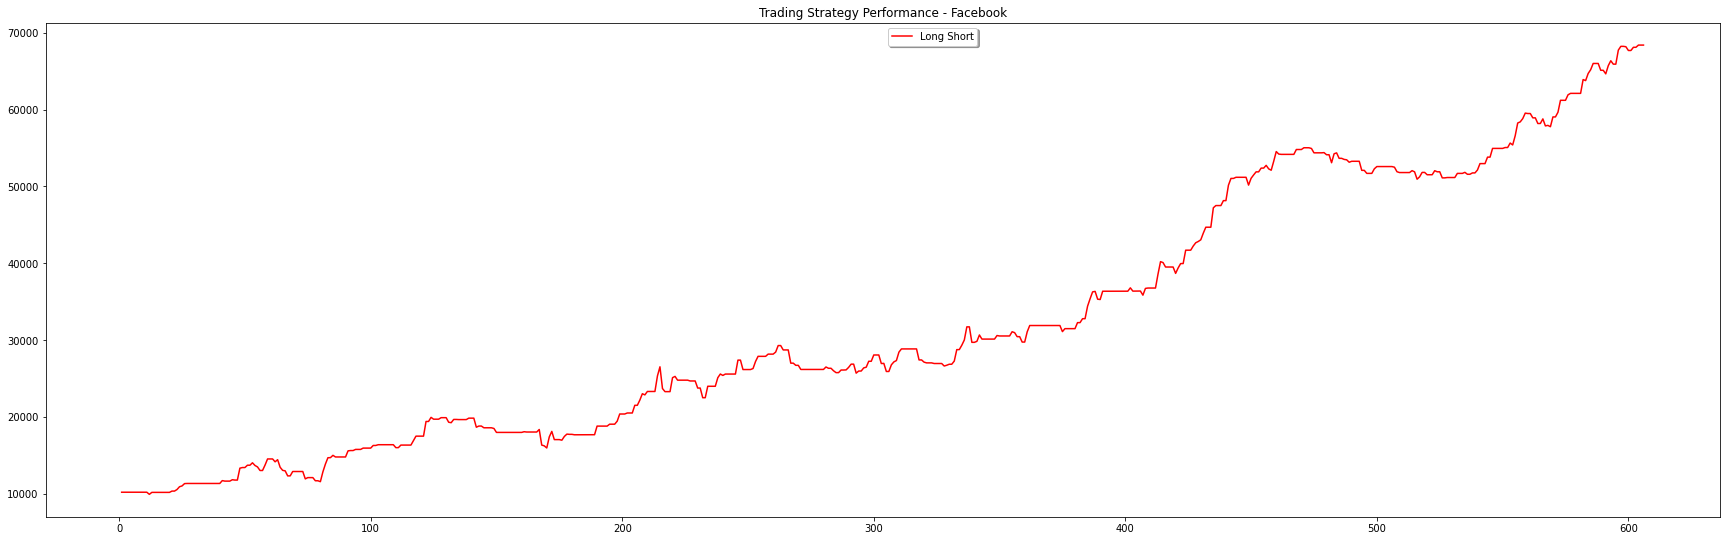

In [24]:
init_bal = 10000 # initial account balance
num_shares = 300 # number of shares being traded in one position

T=y_hat.shape[0]
signal_rule2 = np.zeros(T)
pos_rule2 = np.zeros(T)
for t in range(0, T):
    if y_hat[t] > Y[t]:
        signal_rule2[t] = 1  
    elif y_hat[t] < Y[t]:
        signal_rule2[t] = -1  

for t in range(0, T):
    if t==0:
        pos_rule2[t] = signal_rule2[t]
    elif signal_rule2[t] != signal_rule2[t-1]: 
        # take the first long/short signal as position
        pos_rule2[t] = signal_rule2[t] 

balance_rule2= np.zeros(T)

temp_bal2 = init_bal
for t in range(0,T):  
    # long short
    balance_rule2[t] = temp_bal2 - pos_rule2[t]*num_shares*Y[t] + pos_rule2[t]*num_shares*Y_close[t]
    temp_bal2 = balance_rule2[t]   

# plot account balance
timevec = np.linspace(1,T-1,T-1)
plt.figure(figsize=(30,20))


ax1 = plt.subplot(211)
ax1.plot(timevec, balance_rule2[1:], 'red', label = "Long Short")
ax1.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.title('Trading Strategy Performance - Facebook')
plt.show()

# daily profit and loss


balance_rule2 = np.insert(balance_rule2, 0, init_bal)
profit_loss2 =  np.diff(balance_rule2)

total_profit2 = sum(x for x in profit_loss2 if x>0)    
total_loss2 = abs(sum(x for x in profit_loss2 if x<0))
cnt_profit2 = sum(1 for x in profit_loss2 if x>0)
cnt_loss2 = sum(1 for x in profit_loss2 if x>0)


# daily return in percentage
return2 = (balance_rule2 - init_bal)/init_bal*100

# ratios, assuming 3 month T bill rate around 2%

sharpe2 = (np.mean(return2) - 2)/np.std(return2-2)
# den = ss.gaussian_kde(return1) 
# xs = np.linspace(-3,3,400)
# plt.plot(xs,den(xs))
#plt.show()
den2 = ss.gaussian_kde(return2) 
# xs1 = np.linspace(-3,3,400)
# plt.plot(xs1,den2(xs1))
# plt.show()

In [25]:
import plotly
import chart_studio
import plotly.graph_objs as go
print("Long-Short Strategy")
chart_studio.tools.set_credentials_file(username='gowlichandrakumar.h', api_key='3vIJbD5p3YrL2sA0E9gs')
trace = go.Table(
   header=dict(values=['Metrics', 'Values']),
   cells=dict(values=[['Amount', 'Shares', 'Number of days','Total profit','Total loss','Profit%','Net profit','Profit factor','Profit days',
                      'Loss days','Winning rate','Average Net Profit Per Trade','Average Daily Return','Daily Return STD'],
                      [init_bal, num_shares, T,total_profit2,total_loss2,(total_profit2/init_bal),total_profit2-total_loss2,
                       total_profit2/total_loss2,cnt_profit2
                      ,cnt_loss2,(cnt_profit2/T),(total_profit2-total_loss2)/T,np.mean(return2),np.std(return2)]]))


data = [trace]
py.iplot(data, filename = 'basic_table')

Long-Short Strategy


## Professionalism
50% Minghao Ru

50% Tong Yang


## Licensing
Copyright <2020> Minghao Ru, Tong Yang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.